
# IMT2200 — Proyecto: Conexión y Exploración IGDB API  
## Descarga y exploración inicial de datos de videojuegos (IGDB)

**Autores:** Andres Gonzalez, Luis Romero

**Curso:** IMT2200 - Introducción a Ciencia de Datos (2025-2)

---

### ⚙️ Descripción
Este notebook conecta directamente a la **API de IGDB**, descarga un conjunto de juegos con campos relevantes y los guarda en `data/igdb_games.csv`.

Luego, realiza una **limpieza básica y un análisis exploratorio inicial** (EDA).

> 💡 El objetivo es dejar automatizado el flujo de adquisición de datos para integrarlo después con la API de Steam/SteamCharts.



## 1. Configuración e importación de librerías


In [ ]:

import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

os.makedirs('data', exist_ok=True)



## 2. Autenticación y parámetros de la API IGDB


In [5]:

client_id = "uksbpu6oftndjav5xb8wzk1a8j63fm"
client_secret = "zj3i336wtqr4qc9mizsubfcpi32xlt"  # <-- pega el secreto real de Twitch aquí

url = "https://id.twitch.tv/oauth2/token"
params = {
    "client_id": client_id,
    "client_secret": client_secret,
    "grant_type": "client_credentials"
}

resp = requests.post(url, params=params)
print(resp.json())


{'access_token': 'lcw4wgqn7ltr8rr0b85l65rtawn2dq', 'expires_in': 5314779, 'token_type': 'bearer'}


In [ ]:

CLIENT_ID = "uksbpu6oftndjav5xb8wzk1a8j63fm"      
ACCESS_TOKEN = "lcw4wgqn7ltr8rr0b85l65rtawn2dq"       

IGDB_URL = "https://api.igdb.com/v4/games"

CSV_PATH = "data/igdb_games.csv"

FORZAR_DESCARGA = False



## 3. Descarga de datos desde la API


In [ ]:
def descargar_igdb_todo():
    headers = {
        "Client-ID": CLIENT_ID,
        "Authorization": f"Bearer {ACCESS_TOKEN}"
    }

    all_data = []
    offset = 0
    step = 500

    print("🚀 Descargando todos los juegos disponibles desde IGDB (esto puede demorar varios minutos)...")

    while True:
        query = f"""
            fields name, first_release_date, rating, aggregated_rating, total_rating,
                   total_rating_count, follows, genres.name, platforms.name,
                   involved_companies.company.name, category;
            sort total_rating desc;
            where total_rating != null;
            limit {step};
            offset {offset};
        """

        resp = requests.post(IGDB_URL, headers=headers, data=query)
        if resp.status_code != 200:
            print(f"❌ Error {resp.status_code}: {resp.text}")
            break

        batch = resp.json()
        if not batch:
            print("✅ Descarga completa — no hay más datos disponibles.")
            break

        all_data.extend(batch)
        offset += step
        print(f"📦 Descargados: {len(all_data)} juegos...")

    df = pd.json_normalize(all_data, sep='_')
    return df


df_igdb = descargar_igdb_todo()
df_igdb.to_csv("data/igdb_games.csv", index=False)
print(f"✅ Se guardaron {len(df_igdb)} juegos en data/igdb_games.csv")

df_igdb.head()



🚀 Descargando todos los juegos disponibles desde IGDB (esto puede demorar varios minutos)...
📦 Descargados: 500 juegos...
📦 Descargados: 1000 juegos...
📦 Descargados: 1500 juegos...
📦 Descargados: 2000 juegos...
📦 Descargados: 2500 juegos...
📦 Descargados: 3000 juegos...
📦 Descargados: 3500 juegos...
📦 Descargados: 4000 juegos...
📦 Descargados: 4500 juegos...
📦 Descargados: 5000 juegos...
📦 Descargados: 5500 juegos...
📦 Descargados: 6000 juegos...
📦 Descargados: 6500 juegos...
📦 Descargados: 7000 juegos...
📦 Descargados: 7500 juegos...
📦 Descargados: 8000 juegos...
📦 Descargados: 8500 juegos...
📦 Descargados: 9000 juegos...
📦 Descargados: 9500 juegos...
📦 Descargados: 10000 juegos...
📦 Descargados: 10500 juegos...
📦 Descargados: 11000 juegos...
📦 Descargados: 11500 juegos...
📦 Descargados: 12000 juegos...
📦 Descargados: 12500 juegos...
📦 Descargados: 13000 juegos...
📦 Descargados: 13500 juegos...
📦 Descargados: 14000 juegos...
📦 Descargados: 14500 juegos...
📦 Descargados: 15000 juegos.

,id,aggregated_rating,first_release_date,genres,involved_companies,name,platforms,total_rating,total_rating_count,rating,category
0,338073,100.0,1.749082e+09,"[{'id': 9, 'name': 'Puzzle'}, {'id': 31, 'name...","[{'id': 314016, 'company': {'id': 70, 'name': ...",The Legend of Zelda: Tears of the Kingdom - Ni...,"[{'id': 508, 'name': 'Nintendo Switch 2'}]",100.0,1,NaN,NaN
1,335127,100.0,1.745453e+09,"[{'id': 9, 'name': 'Puzzle'}, {'id': 31, 'name...","[{'id': 311096, 'company': {'id': 5965, 'name'...",Ghost Town,"[{'id': 386, 'name': 'Meta Quest 2'}, {'id': 3...",100.0,1,NaN,NaN
2,315335,100.0,1.737590e+09,"[{'id': 4, 'name': 'Fighting'}, {'id': 33, 'na...","[{'id': 284860, 'company': {'id': 1218, 'name'...",Guilty Gear: Strive - Nintendo Switch Edition,"[{'id': 130, 'name': 'Nintendo Switch'}]",100.0,1,NaN,NaN
3,314239,100.0,1.747699e+09,"[{'id': 13, 'name': 'Simulator'}, {'id': 31, '...","[{'id': 282793, 'company': {'id': 946, 'name':...",RoadCraft,"[{'id': 169, 'name': 'Xbox Series X|S'}, {'id'...",100.0,1,NaN,NaN
4,305556,100.0,1.660781e+09,"[{'id': 7, 'name': 'Music'}]",NaN,Maestro: The Masterclass,"[{'id': 386, 'name': 'Meta Quest 2'}, {'id': 4...",100.0,1,NaN,NaN



## 4. Limpieza y preprocesamiento básico


In [16]:

# Convertir timestamp a fecha
if 'first_release_date' in df_igdb.columns:
    df_igdb['release_date'] = pd.to_datetime(df_igdb['first_release_date'], unit='s', errors='coerce')

# Columnas de texto
text_cols = [c for c in df_igdb.columns if df_igdb[c].dtype == 'object']
for c in text_cols:
    df_igdb[c] = df_igdb[c].astype(str)

# Relleno de valores nulos
df_igdb = df_igdb.fillna({'rating':0, 'aggregated_rating':0, 'total_rating':0, 'total_rating_count':0, 'follows':0})

# Crear una métrica simple de "éxito relativo"
df_igdb['score_exito'] = df_igdb[['rating','aggregated_rating','total_rating']].mean(axis=1)

# Vista rápida
df_igdb[['name','release_date','rating','aggregated_rating','total_rating','score_exito']].head(90)


,name,release_date,rating,aggregated_rating,total_rating,score_exito
0,The Legend of Zelda: Tears of the Kingdom - Ni...,2025-06-05,0.000000,100.000000,100.000000,66.666667
1,Ghost Town,2025-04-24,0.000000,100.000000,100.000000,66.666667
2,Guilty Gear: Strive - Nintendo Switch Edition,2025-01-23,0.000000,100.000000,100.000000,66.666667
3,RoadCraft,2025-05-20,0.000000,100.000000,100.000000,66.666667
4,Maestro: The Masterclass,2022-08-18,0.000000,100.000000,100.000000,66.666667
...,...,...,...,...,...,...
85,Mahjong Soul,2018-06-08,96.315357,0.000000,96.315357,64.210238
86,The Witness,1983-12-31,0.000000,96.285714,96.285714,64.190476
87,Castlevania Advance Collection,2021-09-23,98.371081,94.000000,96.185541,96.185541
88,PlayM2M,2025-03-28,96.155655,0.000000,96.155655,64.103770



## 5. Exploración básica (EDA)


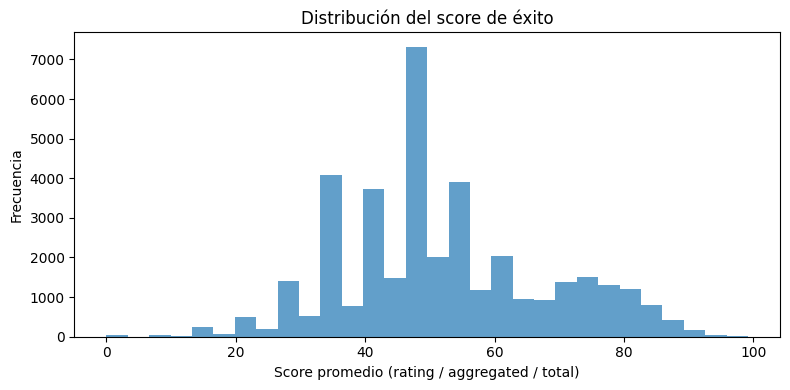

In [13]:

# --- Distribución de ratings ---
plt.figure(figsize=(8,4))
df_igdb['score_exito'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribución del score de éxito')
plt.xlabel('Score promedio (rating / aggregated / total)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# --- Top 10 géneros ---
if 'genres_name' in df_igdb.columns:
    top_genres = df_igdb['genres_name'].value_counts().head(10)
    top_genres.plot(kind='bar', figsize=(8,4))
    plt.title('Top 10 géneros')
    plt.ylabel('Cantidad de juegos')
    plt.tight_layout()
    plt.show()

# --- Top 10 plataformas ---
if 'platforms_name' in df_igdb.columns:
    top_platforms = df_igdb['platforms_name'].value_counts().head(10)
    top_platforms.plot(kind='bar', figsize=(8,4))
    plt.title('Top 10 plataformas')
    plt.ylabel('Cantidad de juegos')
    plt.tight_layout()
    plt.show()
